## BLEU Score

The BLEU (Bilingual Evaluation Understudy) score is a metric commonly used to evaluate the quality of machine-generated translations by comparing them to reference translations. 

> It calculates the precision of overlapping n-grams (word sequences) between the generated translation and the reference translations.

Here's a rough guideline for interpreting BLEU scores in the context of machine translation, which is one of the most common applications of BLEU:

    0 to 0.19: Essentially no correlation between the generated text and the reference translations.
    0.20 to 0.39: Low-quality translations with some overlapping n-grams.
    0.40 to 0.59: Moderate-quality translations, capturing important information but potentially lacking in fluency and accuracy.
    0.60 to 0.79: Good-quality translations that are mostly coherent and faithful to the references.
    0.80 and above: High-quality translations with a high level of fluency and fidelity to the references.

In [1]:
import nltk
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

# Example reference and generated sentences
reference_sent = "The quick brown fox jumps over the lazy dog"
generated_sent = "A brown fox jumps over the scary dogs"

# Tokenize the sentences
reference_tokens = nltk.word_tokenize(reference_sent.lower())
generated_tokens = nltk.word_tokenize(generated_sent.lower())

# Create a list of reference sentences (for BLEU's multi-reference support)
references = [reference_tokens]

# Calculate BLEU score
smoothie = SmoothingFunction().method4  # Use method 4 for smoothing
bleu_score = sentence_bleu(references, generated_tokens, smoothing_function=smoothie)

print(f"Generated Sentence: {generated_sent}")
print(f"Reference Sentence: {reference_sent}")
print(f"BLEU Score: {bleu_score:.4f}")


Generated Sentence: A brown fox jumps over the scary dogs
Reference Sentence: The quick brown fox jumps over the lazy dog
BLEU Score: 0.4562


## sacrebleu

In [ ]:
#pip install datasets

In [30]:
#pip install evaluate

In [28]:
#! pip install sacrebleu

In [3]:
import evaluate
sacrebleu = evaluate.load("sacrebleu")

# SacreBLEU operates on raw text, not tokens
predictions = ["I am good at recollecting "]
references = [["I am very good at recollecting memories", "I will recollect "]]

sacrebleu.compute(predictions=predictions, references=references)

{'score': 49.99999999999999,
 'counts': [5, 3, 1, 0],
 'totals': [5, 4, 3, 2],
 'precisions': [100.0, 75.0, 33.333333333333336, 25.0],
 'bp': 1.0,
 'sys_len': 5,
 'ref_len': 3}

## ROUGE (Recall-Oriented Understudy for Gisting Evaluation)

ROUGE (Recall-Oriented Understudy for Gisting Evaluation) is a set of metrics used to evaluate the quality of machine-generated text, typically in the context of summarization or text generation tasks. ROUGE focuses on comparing the overlap of n-grams (words or phrases) between the generated text and reference text.

> There are different versions of ROUGE metrics, such as ROUGE-N (for n-gram overlap) and ROUGE-L (for longest common subsequence).

In [36]:
#pip install rouge_score

In [4]:
rouge = evaluate.load('rouge')
predictions = ["Hi ", "I am general karyappa"]
references = ["Hi there", "It's me general Karyappa"]

results = rouge.compute(predictions=predictions, references=references)
print(results)

# {'rouge1': 1.0, 'rouge2': 1.0, 'rougeL': 1.0, 'rougeLsum': 1.0}

{'rouge1': 0.5555555555555556, 'rouge2': 0.14285714285714288, 'rougeL': 0.5555555555555556, 'rougeLsum': 0.5555555555555556}


## ROUGE V/s BLEU

#### N-gram Overlap vs. Precision: 

Both metrics are based on n-gram (word or phrase) overlap between the generated text and reference text. However, their emphasis differs. ROUGE primarily emphasizes recall, which means it focuses on capturing how many n-grams in the reference text are present in the generated text. In contrast, BLEU emphasizes precision, measuring how many of the generated n-grams are present in the reference text.

#### Evaluation Focus:

ROUGE: ROUGE metrics are commonly used for tasks like text summarization, where the goal is to capture the key information from the reference text in the generated summary. ROUGE-N (e.g., ROUGE-1, ROUGE-2) measures the overlap of n-grams between the generated and reference text. ROUGE-L focuses on the longest common subsequence of words.

BLEU: BLEU was initially designed for machine translation. It measures how many n-grams in the generated translation match n-grams in the reference translation. BLEU also incorporates a brevity penalty to account for translation length.

#### Metric Values:

ROUGE: ROUGE scores are typically reported in terms of F1 scores (harmonic mean of precision and recall) for various n-gram orders or ROUGE-L.

BLEU: BLEU scores range between 0 and 1, where higher values indicate better quality translations. 

    The "ideal" BLEU score depends on the specific task and the quality of reference translations.


# Perplexity
    

Perplexity is a numerical measure used to assess how well a language model predicts a sequence of words or tokens. It is often used to quantify the uncertainty or "surprise" associated with a language model's predictions. In the context of natural language processing, perplexity is commonly used to evaluate the quality of language models.

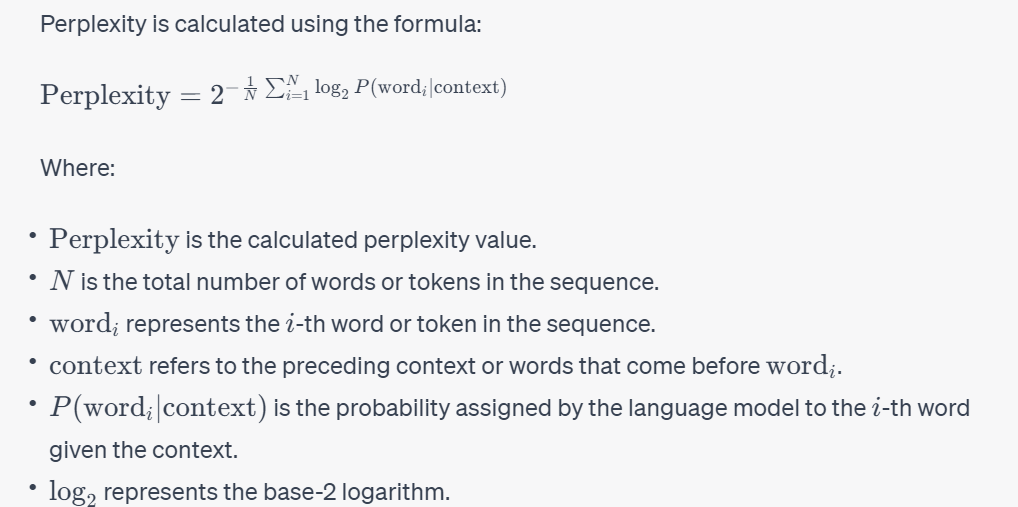




> This formula quantifies the average surprise or uncertainty associated with the language model's predictions across all words in the sequence. 

> Lower perplexity values indicate a better fit between the language model's predictions and the actual sequence, while higher values indicate more unpredictability or divergence from the true data distribution.

To facilitate perplexity calculations on text using various pre-trained LMs, the "LM-PPL" Python library has been developed. This library can compute standard perplexity for recurrent LMs like GPT-3 (Brown et al., 2020), and for encoder-decoder LMs such as BART (Lewis et al., 2020) or T5 (Raffel et al., 2020), it computes perplexity specifically for the decoder component. In the case of masked LMs, pseudo-perplexity (Wang and Cho, 2018) is computed.


For instance, let's consider using perplexity for sentiment analysis. In this context, we can compare two texts, one with a positive sentiment and another with a negative sentiment.

> The objective is to identify the text with the lower perplexity value as the preferred model prediction. This selection is based on the understanding that text with lower perplexity is indicative of a more coherent and representative output.

In [15]:
#pip install lmppl


In [16]:
#pip install --upgrade protobuf

In [33]:
import lmppl
#import tensorflow as tf
scorer = lmppl.EncoderDecoderLM('google/flan-t5-small')
inputs = [
    'sentiment classification: I fell from the bike and some one took me to the hospital.',
    'sentiment classification: I met with an accident and some one took me to the hospital'
]
outputs = [
    'I am Happy',
    'I am sad '
]
ppl = scorer.get_perplexity(input_texts=inputs, output_texts=outputs)



The argument `trust_remote_code` is to be used with Auto classes. It has no effect here and is ignored.
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.58it/s]


In [34]:
print(list(zip(outputs, ppl)))
 #[
 # ('I am happy.', 4138.748977714201),
#  ('I am sad.', 2991.629250051472)
#]

[('I am Happy', 19201.604067941353), ('I am sad ', 3601.782673067435)]


In [35]:
print(f"prediction: {outputs[ppl.index(min(ppl))]}")
 #"prediction: I am sad."

prediction: I am sad 
